In [1]:
# THis example is under development
# TODO: update the order

# Written: sy Aug 2024
# License: BSD-2

"""
 Purpose: Testing Inferer
"""

import os
import sys
import copy
import json
import numpy as np

sys.path.insert(0, "../../")
from brails.utils import Importer
from brails.types.image_set import ImageSet    
from brails.types.asset_inventory import Asset, AssetInventory


# West coast, using existing data table

In [2]:
file_path = "./example_Tiburon.csv"

In [3]:
# create an Importer to get the classes

importer = Importer()
knn_imputer_class = importer.get_class("KnnImputer")

In [4]:
inventory = AssetInventory()
inventory.read_from_csv(file_path,keep_existing=True, id_column='index') 

No existing inventory found. Creating a new inventory


True

In [5]:
inventory.get_asset_features(4)[1]  # empty or 'NA' are missing values

{'index': 4,
 'erabuilt': 'NA',
 'numstories': 2,
 'roofshape': 'Hip',
 'fpAreas': 10802,
 'occupancy2': 'Residential',
 'fparea': '',
 'repaircost': '',
 'constype': '',
 'occupancy': '',
 'type': 'building'}

### Importing imputer and run imputation

In [6]:
imputer=knn_imputer_class()
new_inventory = imputer.impute(inventory,n_possible_worlds=10)

Missing percentages among 3249 assets
erabuilt: 14.19%
numstories: 13.82%
occupancy2: 3.42%
fparea: 14.19%
repaircost: 14.19%
constype: 14.19%
occupancy: 14.19%
Primitive imputation done.
Running the main imputation. This may take a while.
Done imputation. It took 0.06 mins


In [7]:
new_inventory.get_asset_features(4)[1]  # empty or 'NA' are missing values

{'index': 4,
 'erabuilt': 1975.0,
 'numstories': 2,
 'roofshape': 'Hip',
 'fpAreas': 10802,
 'occupancy2': 'Residential',
 'fparea': [4654.0,
  1784.0,
  4654.0,
  4654.0,
  2582.0,
  2582.0,
  4654.0,
  2582.0,
  2582.0,
  1784.0],
 'repaircost': [236440.24,
  419571.341,
  419571.341,
  236440.24,
  419571.341,
  236440.24,
  419571.341,
  322763.278,
  236440.24,
  425334.148],
 'constype': ['W1', 'W1', 'S1', 'S1', 'RM1', 'W1', 'S1', 'RM1', 'S1', 'RM1'],
 'occupancy': ['RES1',
  'RES1',
  'COM4',
  'RES1',
  'RES1',
  'RES3A',
  'RES1',
  'RES3A',
  'COM4',
  'COM4'],
 'type': 'building'}

In [8]:
year_key = 'erabuilt'
occ_key = 'occupancy'
strtype_key = 'constype2'
nstory_key = 'numstories'
n_pw = 0

In [9]:
hazus_inferer_class = importer.get_class("HazusInferer")
inferer=hazus_inferer_class()
new_inventory2 = inferer.infer(new_inventory, n_possible_worlds=10, year_key = year_key, occ_key = occ_key, strtype_key = strtype_key, nstory_key = nstory_key)

Done inference. It took 0.06 mins


In [10]:
new_inventory2.get_asset_features(550)[1]  # empty or 'NA' are missing values

{'index': 550,
 'erabuilt': 1973,
 'numstories': 1,
 'roofshape': 'Flat',
 'fpAreas': 9530,
 'occupancy2': 'Residential',
 'fparea': 2205.0,
 'repaircost': 383015.63,
 'constype': 'W1',
 'occupancy': 'RES1',
 'type': 'building',
 'constype2': 'W1'}

In [11]:
try:
  import plotly.express as px
except:
  !pip install plotly
  import plotly.express as px

category_colors = {
    'W1': 'blue',
    'W2': 'blue',
    'W': 'blue',
    'RM1': 'green',
    'RM2': 'green',
    'M': 'green',
    'C1': 'orange',
    'C2': 'orange',
    'C3': 'orange',
    'C': 'orange',
    'S1': 'black',
    'S2': 'black',
    'S3': 'black',
    'S4': 'black',
    'S5': 'black',
    'S': 'black',
    'PC1': 'pink',
    'PC2': 'pink',
    'MH': 'red',
    'URM': 'grey',
    'H1': 'grey',
    'H': 'grey',
    'nan': 'yellow',
}

In [12]:
# Map the new inventory
new_inventory_re1=new_inventory2.get_world_realization(1)
inventory_new_df, geom_new_df, nbldg = new_inventory_re1.get_dataframe()
fig = px.scatter_mapbox(geom_new_df, lat="Lat", lon="Lon", color=inventory_new_df["constype"].astype(str),range_color=[-1,4], zoom=13, mapbox_style='open-street-map',color_discrete_map=category_colors, width=600, height=450,title='NSI')
fig.show()

In [13]:
new_inventory_re2=new_inventory2.get_world_realization(2)
inventory_new_df, geom_new_df, nbldg = new_inventory_re2.get_dataframe()
fig = px.scatter_mapbox(geom_new_df, lat="Lat", lon="Lon", color=inventory_new_df["constype2"].astype(str),range_color=[-1,4], zoom=13, mapbox_style='open-street-map',color_discrete_map=category_colors,width=600, height=450,title='Inference')
fig.show()

# Example for east coast

In [14]:
import sys
import copy

sys.path.insert(0, "../../")
from brails.utils import Importer
from brails.types.image_set import ImageSet    
from brails.types.asset_inventory import Asset, AssetInventory
importer = Importer()

In [15]:
region_data = {"type": "locationName", "data": "Fort Myers Beach"}
region_boundary_class = importer.get_class("RegionBoundary")
region_boundary_object = region_boundary_class(region_data)

In [16]:
#
# Get Footprints using OSM
#

print("Trying OSM_FootprintsScraper ...")

osm_class = importer.get_class("OSM_FootprintScraper")
osm_data = {"length": "ft"}
osm = osm_class(osm_data)
osm_inventory = osm.get_footprints(region_boundary_object)


Trying OSM_FootprintsScraper ...

Searching for Fort Myers Beach...
Found Fort Myers Beach, Lee County, Florida, 33931, United States

Found a total of 2768 building footprints in Fort Myers Beach


In [17]:
print(osm_inventory.get_asset_features(186))
print(osm_inventory.get_asset_coordinates(186))

(True, {'type': 'Building', 'buildingheight': 'NA', 'erabuilt': 'NA', 'numstories': 'NA', 'roofshape': 'NA', 'fpAreas': 733})
(True, [[-81.8850098, 26.4088159], [-81.8850098, 26.4087721], [-81.8848704, 26.4087676], [-81.8848711, 26.4088121], [-81.8850098, 26.4088159]])


In [18]:
nsi_class = importer.get_class("NSI_Parser")
nsi = nsi_class()

In [19]:
print("\n******** NSI FILTERED DATA FOR SMALL INVENTORY *********")
# another_small_inventory = osm_inventory.get_random_sample(4, 200)
copy_inventory = nsi.get_filtered_data_given_inventory(osm_inventory, "ft")



******** NSI FILTERED DATA FOR SMALL INVENTORY *********

Getting National Structure Inventory (NSI) building data for the entered location input...
Found a total of 2503 building points in NSI that match the footprint data.


In [20]:
copy_inventory.get_asset_features(186)

(True,
 {'type': 'Building',
  'buildingheight': 'NA',
  'erabuilt': 'NA',
  'numstories': 'NA',
  'roofshape': 'NA',
  'fpAreas': 733})

In [21]:
copy_inventory.get_asset_coordinates(186)

(True,
 [[-81.8850098, 26.4088159],
  [-81.8850098, 26.4087721],
  [-81.8848704, 26.4087676],
  [-81.8848711, 26.4088121],
  [-81.8850098, 26.4088159]])

In [22]:
knn_imputer_class = importer.get_class("KnnImputer")
imputer=knn_imputer_class()
fort_myers_imputed = imputer.impute(copy_inventory,n_possible_worlds=10)

Features with no reference data cannot be imputed. Removing them from the imputation target: buildingheight
Missing percentages among 2768 assets
erabuilt: 9.57%
numstories: 9.57%
roofshape: 99.82%
lon: 9.57%
lat: 9.57%
fparea: 9.57%
repaircost: 9.57%
constype: 9.57%
occupancy: 9.57%
fd_id: 9.57%
Primitive imputation done.
Running the main imputation. This may take a while.
Done imputation. It took 0.09 mins


In [23]:
fort_myers_imputed.get_n_pw()

10

In [24]:
#fort_myers_imputed.get_asset_features(186)

In [25]:
hazus_inferer_class = importer.get_class("HazusInferer")
inferer=hazus_inferer_class()

fort_myers_imputed2 = inferer.infer(fort_myers_imputed, n_possible_worlds=10, year_key = "erabuilt", occ_key = "occupancy", strtype_key = "contype2", nstory_key = "numstories")

Done inference. It took 0.06 mins


In [26]:
#fort_myers_imputed2.get_asset_features(186)

In [27]:
try:
  import plotly.express as px
except:
  !pip install plotly
  import plotly.express as px
import numpy as np

category_colors = {
    'W1': 'blue',
    'W2': 'blue',
    'W': 'blue',
    'RM1': 'green',
    'RM2': 'green',
    'M': 'green',
    'C1': 'orange',
    'C2': 'orange',
    'C3': 'orange',
    'C': 'orange',
    'S1': 'black',
    'S2': 'black',
    'S3': 'black',
    'S4': 'black',
    'S5': 'black',
    'S': 'black',
    'PC1': 'pink',
    'PC2': 'pink',
    'MH': 'red',
    'URM': 'grey',
    'H1': 'grey',
    'H': 'grey',
    'nan': 'yellow',
}

In [28]:
# # Table for before imputation
# inventory_df, geom_df, nbldg = copy_inventory.get_dataframe()
# inventory_df.replace('', np.nan, inplace=True) # for visualization
# inventory_df.replace('NA', np.nan, inplace=True) # for visualization
# fig = px.scatter_mapbox(geom_df, lat="Lon", lon="Lat", color=(inventory_df["constype"].astype(str)),range_color=[-1,4],zoom=13, mapbox_style='open-street-map',color_discrete_map=category_colors,width=600, height=450,title='before imputation')
# fig.show()

In [29]:
new_inventory_re1.get_asset_features(186)

(True,
 {'index': 186,
  'erabuilt': 1975,
  'numstories': 1,
  'roofshape': 'Gable',
  'fpAreas': 2440,
  'occupancy2': 'Residential',
  'fparea': 2093.0,
  'repaircost': 495471.08,
  'constype': 'RM1',
  'occupancy': 'RES1',
  'type': 'building',
  'constype2': 'W1'})

In [30]:
#fort_myers_imputed.get_asset_features(186)

In [31]:
# Map the new inventory
new_inventory_re1=fort_myers_imputed2.get_world_realization(0)

inventory_new_df, geom_new_df, nbldg = new_inventory_re1.get_dataframe()
fig = px.scatter_mapbox(geom_new_df, lat="Lat", lon="Lon", color=inventory_new_df["constype"].astype(str),range_color=[-1,4], zoom=13, mapbox_style='open-street-map',color_discrete_map=category_colors, width=600*1.5, height=450*1.5,title='NSI - const type')
fig.show()

In [32]:
# Map the new inventory
new_inventory_re2=fort_myers_imputed2.get_world_realization(0)

inventory_new_df, geom_new_df, nbldg = new_inventory_re2.get_dataframe()
fig = px.scatter_mapbox(geom_new_df, lat="Lat", lon="Lon", color=inventory_new_df["contype2"].astype(str),range_color=[-1,4], zoom=13, mapbox_style='open-street-map',color_discrete_map=category_colors, width=600*1.5, height=450*1.5,title='Hazus - const type world 1')
fig.show()

In [33]:
# Map the new inventory
new_inventory_re2=fort_myers_imputed2.get_world_realization(1)

inventory_new_df, geom_new_df, nbldg = new_inventory_re2.get_dataframe()
fig = px.scatter_mapbox(geom_new_df, lat="Lat", lon="Lon", color=inventory_new_df["contype2"].astype(str),range_color=[-1,4], zoom=13, mapbox_style='open-street-map',color_discrete_map=category_colors, width=600*1.5, height=450*1.5,title='Hazus - const type world 2')
fig.show()

In [34]:
# Map the new inventory
new_inventory_re2=fort_myers_imputed2.get_world_realization(0)

inventory_new_df, geom_new_df, nbldg = new_inventory_re2.get_dataframe()
fig = px.scatter_mapbox(geom_new_df, lat="Lat", lon="Lon", color=inventory_new_df["occupancy"].astype(str),range_color=[-1,4], zoom=13, mapbox_style='open-street-map',color_discrete_map=category_colors, width=600*1.5, height=450*1.5,title='NSI - occupancy')
fig.show()

In [35]:
fort_myers_imputed2.get_world_realization(1)==fort_myers_imputed2.get_world_realization(1)

False

# Austin example

In [36]:
import sys
import copy

sys.path.insert(0, "../../")
from brails.utils import Importer
from brails.types.image_set import ImageSet    
from brails.types.asset_inventory import Asset, AssetInventory
importer = Importer()


In [37]:
region_data = {"type": "locationName", "data": "Austin"}
region_boundary_class = importer.get_class("RegionBoundary")
region_boundary_object = region_boundary_class(region_data)

In [38]:
#
# Get Footprints using OSM
#
import time
elapseStart = time.time()

print("Trying OSM_FootprintsScraper ...")

osm_class = importer.get_class("OSM_FootprintScraper")
osm_data = {"length": "ft"}
osm = osm_class(osm_data)
osm_inventory = osm.get_footprints(region_boundary_object)

elapseEnd = (time.time() - elapseStart) / 60
print("Done inference. It took {:.2f} mins".format(elapseEnd))

Trying OSM_FootprintsScraper ...

Searching for Austin...
Found Austin, Travis County, Texas, United States

Found a total of 295280 building footprints in Austin
Done inference. It took 1.72 mins


In [39]:
nsi_class = importer.get_class("NSI_Parser")
nsi = nsi_class()


In [40]:
print("\n******** NSI FILTERED DATA FOR SMALL INVENTORY *********")
# another_small_inventory = osm_inventory.get_random_sample(4, 200)

elapseStart = time.time()

copy_inventory = nsi.get_filtered_data_given_inventory(osm_inventory, "ft")

elapseEnd = (time.time() - elapseStart) / 60
print("Done inference. It took {:.2f} mins".format(elapseEnd))


******** NSI FILTERED DATA FOR SMALL INVENTORY *********

Getting National Structure Inventory (NSI) building data for the entered location input...
Found a total of 202378 building points in NSI that match the footprint data.
Done inference. It took 0.93 mins


In [41]:
knn_imputer_class = importer.get_class("KnnImputer")
imputer=knn_imputer_class()
austin_imputed = imputer.impute(copy_inventory,n_possible_worlds=1,create_correlation=True, batch_size=500, nbldg_per_cluster=5000)

Missing percentages among 295280 assets
buildingheight: 22.38%
erabuilt: 31.43%
numstories: 31.31%
roofshape: 99.98%
lon: 31.46%
lat: 31.46%
fparea: 31.46%
repaircost: 31.46%
constype: 31.46%
occupancy: 31.46%
fd_id: 31.46%
Primitive imputation done.
Running the main imputation. This may take a while.
Enumerating clusters: 20 among 59
Enumerating clusters: 40 among 59
Done imputation. It took 1.88 mins


In [42]:
hazus_inferer_class = importer.get_class("HazusInferer")
inferer=hazus_inferer_class()

austin_imputed2 = inferer.infer(austin_imputed, n_possible_worlds=10, year_key = "erabuilt", occ_key = "occupancy", strtype_key = "contype2", nstory_key = "numstories")

Done inference. It took 0.93 mins


In [65]:
austin_imputed2.get_asset_features(1234)

(True,
 {'type': 'Building',
  'buildingheight': 22.6,
  'erabuilt': 1991,
  'numstories': 1,
  'roofshape': 'hipped',
  'fpAreas': 5494,
  'lon': -97.75297242,
  'lat': 30.419407427,
  'fparea': 5790.5,
  'repaircost': 653570.362,
  'constype': 'RM1',
  'occupancy': 'COM4',
  'fd_id': 486381534,
  'contype2': ['S3', 'S2', 'S5', 'URM', 'W2', 'URM', 'S5', 'W2', 'W2', 'URM']})

In [44]:
try:
  import plotly.express as px
except:
  !pip install plotly
  import plotly.express as px
import numpy as np

category_colors = {
    'W1': 'blue',
    'W2': 'blue',
    'W': 'blue',
    'RM1': 'green',
    'RM2': 'green',
    'M': 'green',
    'C1': 'orange',
    'C2': 'orange',
    'C3': 'orange',
    'C': 'orange',
    'S1': 'black',
    'S2': 'black',
    'S3': 'black',
    'S4': 'black',
    'S5': 'black',
    'S': 'black',
    'PC1': 'pink',
    'PC2': 'pink',
    'MH': 'red',
    'URM': 'grey',
    'H1': 'grey',
    'H': 'grey',
    'nan': 'yellow',
}

In [45]:
# Map the new inventory
inventory_new_df, geom_new_df, nbldg = austin_imputed.get_dataframe()
inventory_new_df= inventory_new_df.head(1000)
geom_new_df = geom_new_df.head(1000)

fig = px.scatter_mapbox(geom_new_df, lat="Lat", lon="Lon", color=inventory_new_df["constype"].astype(str),range_color=[-1,4], zoom=11, mapbox_style='open-street-map',color_discrete_map=category_colors, width=600*1.5, height=450*1.5,title='NSI - const type')
fig.show()

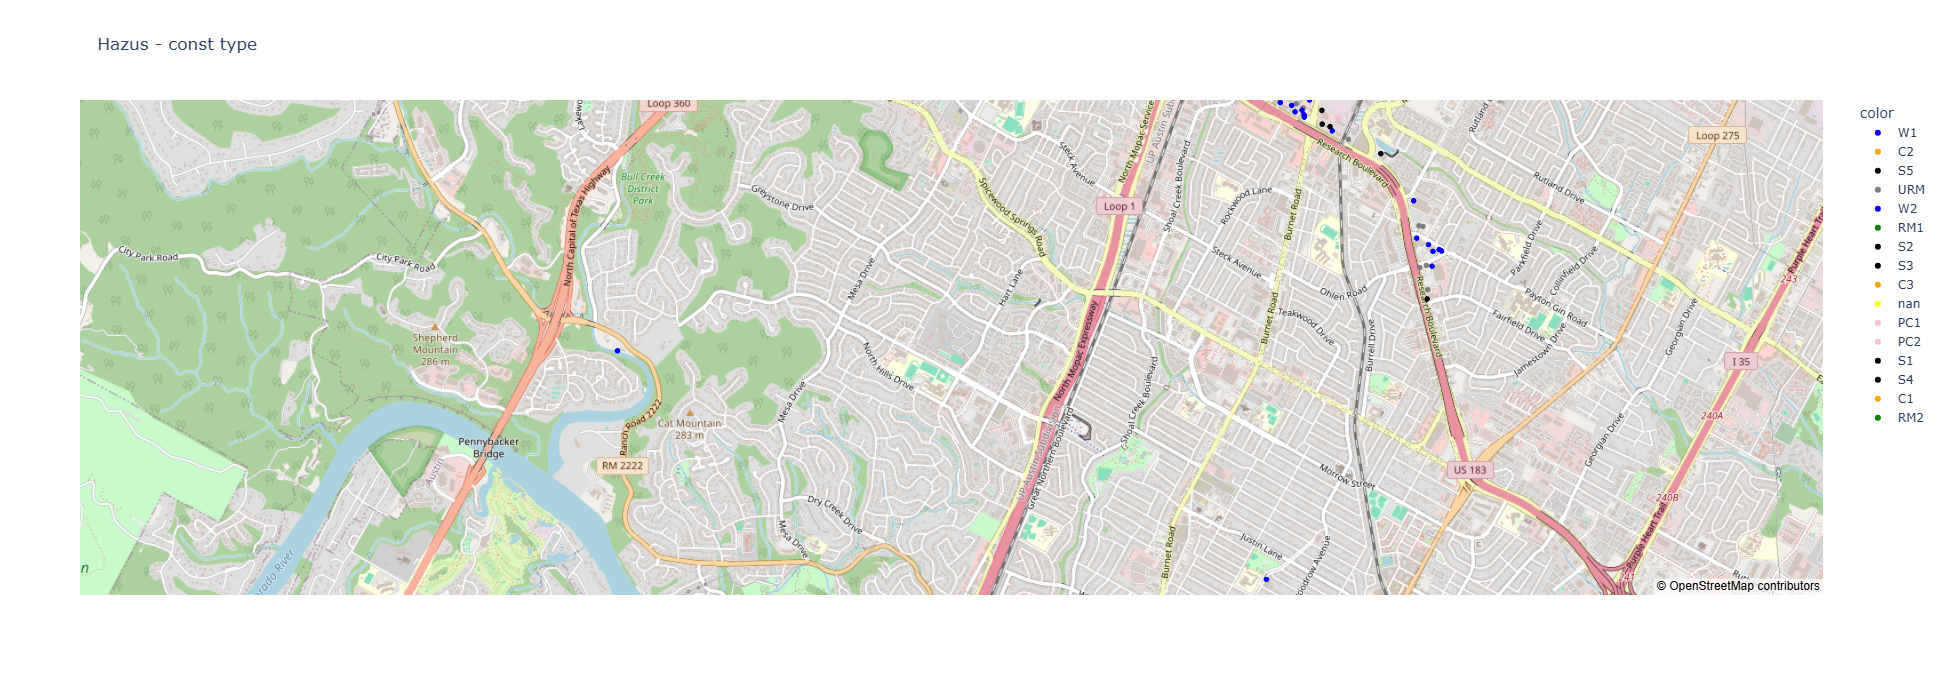

In [66]:
# Map the new inventory
austin_re1 = austin_imputed2.get_world_realization(0)
inventory_new_df, geom_new_df, nbldg = austin_re1.get_dataframe()
inventory_new_df= inventory_new_df.head(1000)
geom_new_df = geom_new_df.head(1000)

fig = px.scatter_mapbox(geom_new_df, lat="Lat", lon="Lon", color=inventory_new_df["contype2"].astype(str),range_color=[-1,4], zoom=11, mapbox_style='open-street-map',color_discrete_map=category_colors, width=600*1.5, height=450*1.5,title='Hazus - const type')
fig.show()